## Métodos de Otimização: Método Híbrido

### Enxame de Partículas + Steepest_Descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os
import random
import time
name = 'Método Híbrido' 
Start = time.time()

In [2]:
def f(x,nFunc,nVar,countFunc):
    f = open("var.dat", "w")
    f.write(str(nFunc)+"\n")
    f.write(str(nVar)+"\n")
    for i in range(0, len(x)):
        f.write(str(x[i])+'\n')
    f.close()
    
    result = os.system("funcao.exe")
    
    f = open("obj.dat", "r")
    u = float(f.read())
    f.close()
    countFunc += 1
    return u,countFunc

In [3]:
def grad(x,countFunc):
    epsilon = 1.e-10
    nFunc = 5; Qvar = 2
    
    for i in range(0,len(x)):
        xtmp=x.copy()
        xtmp[i]=xtmp[i]+epsilon
        F_xtmp, countFunc = f(xtmp,nFunc,Qvar,countFunc)
        F_x, countFunc = f(x,nFunc,Qvar,countFunc)
        G[i]=(F_xtmp-F_x)/epsilon
    
    return G,countFunc

In [4]:
nFunc = 5
Qvar = 2
Qtind = 50
kmax = 150
countFunc = 0

pop =np.zeros((Qtind,Qvar) , dtype = 'float')
x =np.zeros((Qtind,Qvar) , dtype = 'float')
fHist = []
fpop =np.zeros(Qtind , dtype = 'float')
fsol =np.zeros(Qtind , dtype = 'float')
pbest =np.zeros(Qvar , dtype = 'float')
xmin =np.zeros(Qvar , dtype = 'float')
xmax =np.zeros(Qvar , dtype = 'float')
r =np.zeros(Qvar , dtype = 'float')
r1 =np.zeros(Qvar , dtype = 'float')
r2 =np.zeros(Qvar , dtype = 'float')

xmin[0] = -10; xmin[1] = -10
xmax[0] = 10; xmax[1] = 10

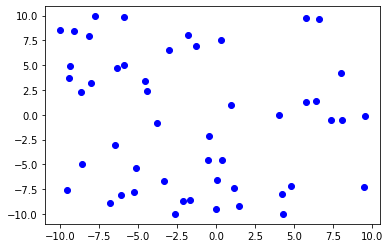

In [5]:
#criando a populacao inicial e suas funcoes objetivo
#o melhor individuo ja esta definido (pop == pi)

for i in range(0, Qtind):
    for j in range(0, Qvar):
        r[j] = random.random()
        pop[i,j] = xmin[j]+(1.-r[j])*(xmax[j]-xmin[j])
    fpop[i],countFunc = f(pop[i,:],nFunc,Qvar,countFunc)

plt.plot(pop[:,0], pop[:,1], 'bo')
plt.show()

In [6]:
minlocobj=np.argmin(fpop)
pbest[:]=pop[minlocobj,:]
fbest=fpop[minlocobj]
print(fbest)

6.60957729574663


In [7]:
x=pop.copy()
layout = "{0:.5f}"
k=0; e = 1.e-3; count = 0; k_tot = 0
while k < kmax:
    k += 1
    k_tot +=1
    for i in range(0, Qtind):
        for j in range(0, Qvar):
            r1[j] = random.random()
            r2[j] = random.random()
            x[i,j] = x[i,j] + 2.*r1[j]*(pop[i,j]-x[i,j]) + 2.*r2[j]*(pbest[j]-x[i,j])
            x[i,j] = max(min(x[i,j],xmax[j]),xmin[j])

        fsol[i],countFunc = f(x[i,:],nFunc,Qvar,countFunc)
        
    for i in range(0, Qtind):
        if fsol[i] < fpop[i] :
            fpop[i]=fsol[i]
            pop[i,:]=x[i,:]
        
    minlocobj=np.argmin(fpop)
    pbest[:]=pop[minlocobj,:]
    fbest=fpop[minlocobj]
    print(layout.format(pbest[0])+" "+layout.format(pbest[1])+" "+layout.format(fbest))
    fHist.append(fbest)
    for i in range(0, Qtind):
        if (np.abs(fbest-fpop[i]) <= e):
            count +=1 
    if count/Qtind >= 0.9:
        break
    

10.00000 3.32516 2.04695
3.45022 2.78808 1.40133
3.23965 1.88371 0.54391
3.23965 1.88371 0.54391
9.49721 2.55216 0.42330
9.39059 2.55740 0.41584
9.44749 2.51209 0.40068
9.44287 2.47490 0.39970
9.44287 2.47490 0.39970
9.42233 2.47655 0.39793
9.42381 2.47794 0.39791
9.42635 2.47814 0.39790
9.42520 2.47798 0.39790


In [8]:
print(pbest[:])

[9.42519824 2.47798069]


In [9]:
alfa=0.1; kmax=10; k=0; countFunc=0

xold =np.zeros(Qvar , dtype = 'float')
xnew =np.zeros(Qvar , dtype = 'float')
G =np.zeros(Qvar , dtype = 'float')

#chute incial:
for i in range(0, Qvar):
    xold[i] = pbest[i]
    
F0,countFunc = f(xold,nFunc,Qvar,countFunc)
layout = "{0:.5f}"
print(layout.format(xold[0])+" "+layout.format(xold[1])+" "+layout.format(F0))
fHist.append(F0)

while k < kmax:
    k += 1
    k_tot +=1
    # Calculo Gradiente
    G,countFunc = grad(xold,countFunc)
    
    # Processo iterativo
    xnew=xold-alfa*G
    
    #Atualiza xold
    xold = xnew.copy()
    
    #Calculo da função
    F,countFunc = f(xnew,nFunc,Qvar,countFunc)
    print(layout.format(xnew[0])+" "+layout.format(xnew[1])+" "+layout.format(F))
    fHist.append(F)

9.42520 2.47798 0.39790
9.42524 2.47746 0.39789
9.42515 2.47704 0.39789
9.42509 2.47670 0.39789
9.42503 2.47641 0.39789
9.42499 2.47617 0.39789
9.42495 2.47597 0.39789
9.42492 2.47580 0.39789
9.42490 2.47567 0.39789
9.42488 2.47556 0.39789
9.42486 2.47546 0.39789


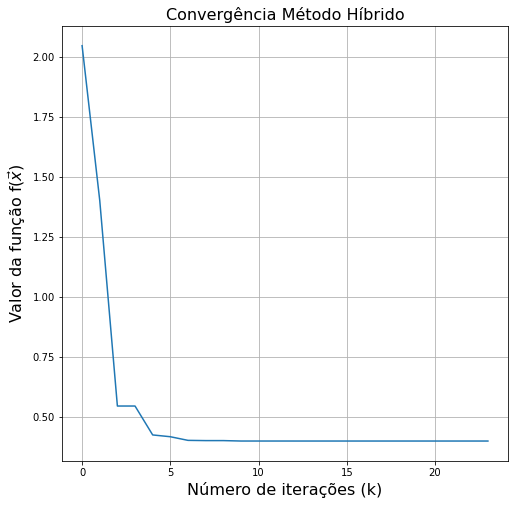

In [10]:
font = {
        'size': 16,
        }

plt.figure(figsize=(8,8))
plt.plot(np.arange(0,k_tot+1),fHist)
plt.grid()
plt.title(f'Convergência {name}', fontdict=font)
plt.ylabel(r'Valor da função f($\vec{x}$)', fontdict=font)
plt.xlabel("Número de iterações (k)", fontdict=font)
plt.show()

In [11]:
print("Quantidade de chamadas da função obj = ", countFunc)
End = time.time()
print("Tempo de Execução =", End-Start, "s")	

Quantidade de chamadas da função obj =  51
Tempo de Execução = 16.32745862007141 s
